텐서플로우 VS 넘파이
- 둘은 수학적으로 사용되며 호환이 됨
-

In [ ]:
import tensorflow as tf
print(tf.__version__)
tf.random.uniform([2,3], 0, 1)    # 0과 1 사이의 2*3행렬

2.15.0


<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.6824664 , 0.45184016, 0.51809037],
       [0.8672434 , 0.6193825 , 0.14765728]], dtype=float32)>

In [ ]:
import tensorflow as tf
import numpy as np
t = tf.random.uniform([2,3],0,1)
n = np.random.uniform(0,1,[2,3])
print(f'tensorflow로 사용한 텐서 : {t}')
print(f'numpy로 생성한 array : {n}')

tensorflow로 사용한 텐서 : [[0.04129732 0.594339   0.6901165 ]
 [0.08810973 0.18008506 0.7692753 ]]
numpy로 생성한 array : [[0.02588026 0.2944845  0.13437479]
 [0.94016142 0.53393715 0.123148  ]]


In [ ]:
print(f't+n={t+n}')

t+n=[[0.06717758 0.8888235  0.8244913 ]
 [1.0282712  0.7140222  0.89242333]]


텐서
 - 0차원 텐서 : 스칼라, 상수
 - 1차원 텐서 :벡터(3,5,10) iris데이터의 샘플 한개
 - 2차원 텐서 : 행렬 흑백으로 이루어진 영상 한장
 - 3차원 텐서 -- n차원 텐서

텐서플로사 제공하는 데이터

In [ ]:
import tensorflow as tf
import tensorflow.keras.datasets as ds

# MNIST 데이터셋 - 흑백 이미지
(X_train,y_train), (_, _) = ds.mnist.load_data()
y_train_onehot = tf.one_hot(y_train,10, dtype=tf.int8 )
print(X_train.shape, y_train.shape, y_train_onehot.shape)

# CIFAR-10 데이터셋 - 컬러 이미지
(X_train,y_train), (_, _) = ds.cifar10.load_data()
y_train_onehot = tf.one_hot(y_train, 10, dtype=tf.int8 )
print(X_train.shape, y_train.shape, y_train_onehot.shape)

# Boston Housing 데이터셋
(X_train,y_train), (_, _) = ds.boston_housing.load_data()
print(X_train.shape, y_train.shape)

# Reuters 뉴스 데이터셋
(X_train,y_train), (_, _) = ds.reuters.load_data()
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,) (60000, 10)
(50000, 32, 32, 3) (50000, 1) (50000, 1, 10)
(404, 13) (404,)
(8982,) (8982,)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
# 데이터를 읽어서 신경망에 입력할 형태로 변환
(X_train,y_train),(X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [ ]:
# 표준화
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [ ]:
# y 데이터 one hot
# y_train_onehot = tf.one_hot(y_train,10,dtype=tf.int8)
# y_test_onehot = tf.one_hot(y_test,10,dtype=tf.int8)
y_train_onehot = tf.keras.utils.to_categorical(y_train,10)
y_test_onehot = tf.keras.utils.to_categorical(y_test,10)

In [ ]:
# 신경망 구조 설계
n_input = (X_train.shape[1], X_train.shape[2])
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

mlp = Sequential()
mlp.add( Flatten(input_shape=n_input)  )
mlp.add( Dense(n_hidden1, activation='relu')  )
mlp.add( Dense(n_hidden2, activation='relu')  )
mlp.add( Dense(n_hidden3, activation='relu')  )
mlp.add( Dense(n_hidden4, activation='relu')  )
mlp.add( Dense(n_output, activation='softmax')  )

# 신경망 학습
adam_ = Adam(learning_rate=0.001)
mlp.compile(optimizer=adam_, loss = 'categorical_crossentropy',metrics='accuracy')
ealy_stopping = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)

hist = mlp.fit(X_train_scaled,y_train_onehot,batch_size=128, epochs=60,validation_split=0.2,
               callbacks=[checkpoint_cb,ealy_stopping] ,  verbose=2)


Epoch 1/60
375/375 - 19s - loss: 0.2372 - accuracy: 0.9274 - val_loss: 0.1164 - val_accuracy: 0.9643 - 19s/epoch - 51ms/step
Epoch 2/60
375/375 - 16s - loss: 0.0916 - accuracy: 0.9717 - val_loss: 0.1096 - val_accuracy: 0.9697 - 16s/epoch - 44ms/step
Epoch 3/60
375/375 - 17s - loss: 0.0633 - accuracy: 0.9803 - val_loss: 0.0995 - val_accuracy: 0.9716 - 17s/epoch - 45ms/step
Epoch 4/60
375/375 - 17s - loss: 0.0484 - accuracy: 0.9844 - val_loss: 0.1158 - val_accuracy: 0.9707 - 17s/epoch - 47ms/step
Epoch 5/60
375/375 - 17s - loss: 0.0382 - accuracy: 0.9877 - val_loss: 0.0922 - val_accuracy: 0.9763 - 17s/epoch - 45ms/step
Epoch 6/60
375/375 - 17s - loss: 0.0308 - accuracy: 0.9903 - val_loss: 0.0917 - val_accuracy: 0.9754 - 17s/epoch - 46ms/step
Epoch 7/60
375/375 - 18s - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0923 - val_accuracy: 0.9772 - 18s/epoch - 47ms/step
Epoch 8/60
375/375 - 17s - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.1137 - val_accuracy: 0.9749 - 17s/epoch - 44ms/step


In [ ]:
tf.keras.utils.to_categorical(y_train,10).shape, tf.one_hot(y_train, 10).shape

((60000, 10), TensorShape([60000, 10]))

In [ ]:
############ GPT수정본 ################


# 신경망 구조 설계
n_input = (X_train.shape[1], X_train.shape[2])
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

mlp = Sequential()
mlp.add(Flatten(input_shape=n_input))
mlp.add(Dense(n_hidden1, activation='relu'))
mlp.add(Dense(n_hidden2, activation='relu'))
mlp.add(Dense(n_hidden3, activation='relu'))
mlp.add(Dense(n_hidden4, activation='relu'))
mlp.add(Dense(n_output, activation='relu'))

# 신경망 학습
adam = Adam(learning_rate=0.001)
mlp.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# 콜백 정의
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)

# 학습
hist = mlp.fit(X_train_scaled, y_train_onehot, batch_size=128, epochs=60, validation_split=0.2,
              callbacks=[checkpoint_cb, early_stopping], verbose=2)

Epoch 1/60
375/375 - 22s - loss: nan - accuracy: 0.1123 - val_loss: nan - val_accuracy: 0.0995 - 22s/epoch - 58ms/step
Epoch 2/60
375/375 - 16s - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995 - 16s/epoch - 43ms/step


In [ ]:
# 분류에 해당하는 데이터를 가져옴
# 지금까지 배운 신경망을 이용해서 분류모델을 만들고
# 시각화를 통해 성능을 검증해보고 - 과적합
# 평가

In [ ]:
# https://drive.google.com/file/d/1mEiWSp7zBeRE975To6BRzjsPbAJC2dbQ/view?usp=sharing
# wget --no-check-certificate 'https://docs.google.com/uc?export=download&id={FILEID}' -O {FILENAME}
!wget https://drive.google.com/uc?id=1mEiWSp7zBeRE975To6BRzjsPbAJC2dbQ -O download.zip

--2024-04-18 02:42:22--  https://drive.google.com/uc?id=1mEiWSp7zBeRE975To6BRzjsPbAJC2dbQ
Resolving drive.google.com (drive.google.com)... 173.194.79.101, 173.194.79.139, 173.194.79.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.79.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1mEiWSp7zBeRE975To6BRzjsPbAJC2dbQ [following]
--2024-04-18 02:42:23--  https://drive.usercontent.google.com/download?id=1mEiWSp7zBeRE975To6BRzjsPbAJC2dbQ
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.218.132, 2a00:1450:4013:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.218.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128894 (126K) [application/octet-stream]
Saving to: ‘download.zip’

download.zip        100%[===================>] 125.87K  --.-KB/s    in 0.001s  

2024-04-18 02:42:23 (118 MB/s) -

In [ ]:
!pip install gdown
!pip install ucimlrepo

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1mEiWSp7zBeRE975To6BRzjsPbAJC2dbQ'
output = 'test.zip'
gdown.download(url,output)

Downloading...
From: https://drive.google.com/uc?id=1mEiWSp7zBeRE975To6BRzjsPbAJC2dbQ
To: /content/test.zip
100%|██████████| 129k/129k [00:00<00:00, 79.4MB/s]


'test.zip'

In [ ]:
!unzip /content/download.zip

Archive:  /content/download.zip
replace Index? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

Exception ignored in: <function _xla_gc_callback at 0x7e7a3747c5e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [ ]:
heart_disease.metadata.data_url

'https://archive.ics.uci.edu/static/public/45/data.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(heart_disease.metadata.data_url)
df.num.value_counts()
#0 정상
# 1 심장 백내장
# 2 협심증
# 3 심근경색

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [ ]:
# 필요한 라이브러리
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
# 데이터 로드
# 데이터 로드
df = pd.read_csv(heart_disease.metadata.data_url)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca           True
thal         True
num         False
dtype: bool

In [ ]:
df.isnull().mean()

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          0.013201
thal        0.006601
num         0.000000
dtype: float64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
num         False
dtype: bool

In [ ]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()
X.shape, y.shape

((297, 13), (297,))

In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=0)
# 표준화 - 이상치 존재로 standard scaler 사용
ss = StandardScaler()
X_train_scaled =  ss.fit_transform(X_train);  X_test_scaled =  ss.transform(X_test)
X_train_scaled.shape, y_train.shape

((237, 13), (237,))

In [ ]:
n_input = X_train_scaled.shape[1]
n_hidden1 = 10
n_output = len(np.unique(y))

model = Sequential()
model.add( Dense(n_hidden1,activation = 'relu', input_shape=(n_input, ) )   )
model.add( Dense(n_output,activation = 'softmax' )   )

model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics='accuracy')
ealy_stopping = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)

hist = model.fit(X_train_scaled, y_train, validation_split=0.2, callbacks=[ealy_stopping,checkpoint_cb],
          epochs=100, verbose=2)

Epoch 1/100
6/6 - 3s - loss: 1.9929 - accuracy: 0.2011 - val_loss: 2.0309 - val_accuracy: 0.2708 - 3s/epoch - 546ms/step
Epoch 2/100
6/6 - 0s - loss: 1.9426 - accuracy: 0.2169 - val_loss: 1.9876 - val_accuracy: 0.2708 - 174ms/epoch - 29ms/step
Epoch 3/100
6/6 - 0s - loss: 1.8973 - accuracy: 0.2434 - val_loss: 1.9471 - val_accuracy: 0.2708 - 201ms/epoch - 33ms/step
Epoch 4/100
6/6 - 0s - loss: 1.8561 - accuracy: 0.2646 - val_loss: 1.9077 - val_accuracy: 0.2708 - 262ms/epoch - 44ms/step
Epoch 5/100
6/6 - 0s - loss: 1.8159 - accuracy: 0.2698 - val_loss: 1.8708 - val_accuracy: 0.2708 - 275ms/epoch - 46ms/step
Epoch 6/100
6/6 - 0s - loss: 1.7764 - accuracy: 0.2698 - val_loss: 1.8361 - val_accuracy: 0.2917 - 132ms/epoch - 22ms/step
Epoch 7/100
6/6 - 0s - loss: 1.7396 - accuracy: 0.2910 - val_loss: 1.8035 - val_accuracy: 0.3125 - 114ms/epoch - 19ms/step
Epoch 8/100
6/6 - 0s - loss: 1.7041 - accuracy: 0.3228 - val_loss: 1.7718 - val_accuracy: 0.3333 - 120ms/epoch - 20ms/step
Epoch 9/100
6/6 - 

In [ ]:
# 상관관계
# 공분산
# 각종 머신러닝 기법을 통해
# 최적의 feature를 찾기

In [ ]:
# Solution 1 : 다중분류 -> 2진분류
# 0 ->1  1 2 3 4 -> 0
print(f'original data : {y[:5]}')
new_y = np.array([  1 if label == 0 else 0  for label in y])
print(f'new_y:{new_y[:5]}')

#데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, new_y, stratify=new_y,random_state=0)
ss=StandardScaler()
X_train_scaled = ss.fit_transform(X_train); X_test_scaled = ss.transform(X_test)

original data : [0 2 1 0 0]
new_y:[1 0 0 1 1]


In [ ]:
# 이진분류 신경망 만들기 - 함수

class ANN_Binary():
  def __init__(self,n_input,n_hidden,n_output,learning_rate=0.001):
    self.n_input = n_input
    self.n_hidden = n_hidden
    self.n_output = n_output

    self.dense1 = Dense(n_hidden,activation='relu',input_shape = (n_input,))
    self.dense2 = Dense(n_hidden,activation='relu')
    self.dropout = Dropout(0.1)
    self.dense3 = Dense(n_output,activation='sigmoid')

    self.optim = Adam(learning_rate=learning_rate)
    self.ealy_stopping = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
    self.checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
  def fit(self,X,y,epochs=200):
    model = Sequential([
        self.dense1,
        self.dense2,
        self.dropout,
        self.dense3
    ])
    model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics='accuracy')
    hist = model.fit(X, y, validation_split=0.2, callbacks=[self.ealy_stopping,self.checkpoint_cb],
          epochs=epochs, verbose=2)
    return hist

  def get_best_model(self):
    return tf.keras.models.load_model('best_model.keras')

  def score(self,X,y):
    return self.get_best_model().evaluate(X,y)

n_input = X_train_scaled.shape[1]
n_hidden = 15
n_output = 1

mymodel = ANN_Binary(n_input,n_hidden,n_output,learning_rate=0.001)
mymodel.fit(X_train_scaled,y_train)
mymodel.score(X_test_scaled, y_test)


# 이진분류 신경망 만들기

# n_input = X_train_scaled.shape[1]
# n_hidden1 = 10
# n_hidden2 = 5
# n_hidden3 = 3
# n_output = 1

# model = Sequential()
# model.add( Dense(n_hidden1,activation = 'relu', input_shape=(n_input, ) )   )
# model.add( Dense(n_hidden2,activation = 'relu' )   )
# model.add( Dense(n_hidden3,activation = 'relu' )   )
# model.add(Dropout(0.25))
# model.add( Dense(n_output,activation = 'sigmoid' )   )

# opti = Adam(learning_rate=1e-4)  # 기본이 0.001 -> 0.0001  -> 1/10000

# model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics='accuracy')
# ealy_stopping = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
# checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)

# hist = model.fit(
#     X_train_scaled, y_train,
#     validation_split=0.2,
#     callbacks=[ealy_stopping, checkpoint_cb],
#     epochs=200,
#     verbose=2
# )

Epoch 1/200
6/6 - 2s - loss: 0.6601 - accuracy: 0.6158 - val_loss: 0.5860 - val_accuracy: 0.7556 - 2s/epoch - 414ms/step
Epoch 2/200
6/6 - 0s - loss: 0.6452 - accuracy: 0.6215 - val_loss: 0.5714 - val_accuracy: 0.7556 - 68ms/epoch - 11ms/step
Epoch 3/200
6/6 - 0s - loss: 0.6003 - accuracy: 0.6554 - val_loss: 0.5585 - val_accuracy: 0.7778 - 71ms/epoch - 12ms/step
Epoch 4/200
6/6 - 0s - loss: 0.6170 - accuracy: 0.6271 - val_loss: 0.5457 - val_accuracy: 0.7778 - 70ms/epoch - 12ms/step
Epoch 5/200
6/6 - 0s - loss: 0.5931 - accuracy: 0.7119 - val_loss: 0.5341 - val_accuracy: 0.7778 - 103ms/epoch - 17ms/step
Epoch 6/200
6/6 - 0s - loss: 0.5733 - accuracy: 0.6949 - val_loss: 0.5230 - val_accuracy: 0.8000 - 118ms/epoch - 20ms/step
Epoch 7/200
6/6 - 0s - loss: 0.5520 - accuracy: 0.7288 - val_loss: 0.5123 - val_accuracy: 0.8444 - 117ms/epoch - 20ms/step
Epoch 8/200
6/6 - 0s - loss: 0.5299 - accuracy: 0.7514 - val_loss: 0.5023 - val_accuracy: 0.8444 - 136ms/epoch - 23ms/step
Epoch 9/200
6/6 - 0s 

[0.42749518156051636, 0.8133333325386047]

In [ ]:
best_model = tf.keras.models.load_model('best_model.keras')
best_model.evaluate(X_test_scaled, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.4275 - accuracy: 0.8133


[0.42749518156051636, 0.8133333325386047]

깊은 다층 퍼셉트론으로 MNIST 인식

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
# 데이터를 읽어서 신경망에 입력할 형태로 변환
(X_train,y_train),(X_test, y_test) = mnist.load_data()
# 표준화
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0
# y 데이터 one hot
# y_train_onthot = tf.one_hot(y_train,10,dtype=tf.int8)
# y_test_onthot = tf.one_hot(y_test,10,dtype=tf.int8)
y_train_onthot = tf.keras.utils.to_categorical(y_train,10)  #  one-hot
y_test_onthot = tf.keras.utils.to_categorical(y_test,10)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# 신경망 구조 설계
n_input = (X_train.shape[1], X_train.shape[2])
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

mlp = Sequential()
mlp.add( Flatten(input_shape=n_input)  )
mlp.add( Dense(n_hidden1, activation='relu')  )
mlp.add( Dense(n_hidden2, activation='relu')  )
mlp.add( Dense(n_hidden3, activation='relu')  )
mlp.add( Dense(n_hidden4, activation='relu')  )
mlp.add( Dense(n_output, activation='softmax')  )

# 신경망 학습
adam_ = Adam(learning_rate=0.001)
mlp.compile(optimizer=adam_, loss = 'categorical_crossentropy',metrics='accuracy')
ealy_stopping = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)

hist = mlp.fit(X_train_scaled,y_train_onthot,batch_size=128, epochs=60,validation_split=0.2,
               callbacks=[checkpoint_cb,ealy_stopping] ,  verbose=2)

Epoch 1/60
375/375 - 37s - loss: 0.2299 - accuracy: 0.9288 - val_loss: 0.1077 - val_accuracy: 0.9678 - 37s/epoch - 100ms/step
Epoch 2/60
375/375 - 23s - loss: 0.0952 - accuracy: 0.9708 - val_loss: 0.1037 - val_accuracy: 0.9682 - 23s/epoch - 60ms/step
Epoch 3/60
375/375 - 20s - loss: 0.0596 - accuracy: 0.9813 - val_loss: 0.1165 - val_accuracy: 0.9663 - 20s/epoch - 53ms/step
Epoch 4/60
375/375 - 27s - loss: 0.0523 - accuracy: 0.9841 - val_loss: 0.1052 - val_accuracy: 0.9703 - 27s/epoch - 73ms/step


In [4]:
tf.keras.utils.to_categorical(y_train,10).shape, tf.one_hot(y_train, 10).shape

((60000, 10), TensorShape([60000, 10]))

In [5]:
# 분류 에 해당하는 데이터를 가져와서
# 지금까지 배운 신경망을 이용해서 분류 모델을 만들고
# 시각화를통해 성능을 검증해보고 = 과적합
# 평가

In [6]:
# https://drive.google.com/file/d/1mEiWSp7zBeRE975To6BRzjsPbAJC2dbQ/view?usp=sharing
# wget --no-check-certificate 'https://docs.google.com/uc?export=download&id={FILEID}' -O {FILENAME}
!wget https://drive.google.com/uc?id=1mEiWSp7zBeRE975To6BRzjsPbAJC2dbQ -O download.zip

--2024-05-01 11:13:24--  https://drive.google.com/uc?id=1mEiWSp7zBeRE975To6BRzjsPbAJC2dbQ
Resolving drive.google.com (drive.google.com)... 142.251.162.138, 142.251.162.113, 142.251.162.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.162.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1mEiWSp7zBeRE975To6BRzjsPbAJC2dbQ [following]
--2024-05-01 11:13:24--  https://drive.usercontent.google.com/download?id=1mEiWSp7zBeRE975To6BRzjsPbAJC2dbQ
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.134.132, 2607:f8b0:400c:c0c::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.134.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128894 (126K) [application/octet-stream]
Saving to: ‘download.zip’

download.zip        100%[===================>] 125.87K  --.-KB/s    in 0.002s  

2024-05-01 11:13:25 (69.7 MB/s

In [7]:
!pip install gdown

In [8]:
import gdown
url = 'https://drive.google.com/uc?id=1mEiWSp7zBeRE975To6BRzjsPbAJC2dbQ'
output = 'test.zip'
gdown.download(url,output)

Downloading...
From: https://drive.google.com/uc?id=1mEiWSp7zBeRE975To6BRzjsPbAJC2dbQ
To: /content/test.zip
100%|██████████| 129k/129k [00:00<00:00, 34.4MB/s]


'test.zip'

In [9]:
!unzip /content/download.zip

Archive:  /content/download.zip
  inflating: Index                   
  inflating: WARNING                 
  inflating: ask-detrano             
  inflating: bak                     
  inflating: cleve.mod               
  inflating: cleveland.data          
   creating: costs/
  inflating: costs/Index             
  inflating: costs/heart-disease.README  
  inflating: costs/heart-disease.cost  
  inflating: costs/heart-disease.delay  
  inflating: costs/heart-disease.expense  
  inflating: costs/heart-disease.group  
  inflating: heart-disease.names     
  inflating: hungarian.data          
  inflating: long-beach-va.data      
  inflating: new.data                
  inflating: processed.cleveland.data  
  inflating: processed.hungarian.data  
  inflating: processed.switzerland.data  
  inflating: processed.va.data       
  inflating: reprocessed.hungarian.data  
  inflating: switzerland.data        


In [10]:
!pip install ucimlrepo

In [11]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [12]:
heart_disease.metadata.data_url

'https://archive.ics.uci.edu/static/public/45/data.csv'

In [13]:
import pandas as pd
df = pd.read_csv(heart_disease.metadata.data_url)
df.num.value_counts()
#0 정상
# 1 심장 백내장
# 2 협심증
# 3 심근경색
# 4
# 303-164 = 139

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [14]:
# 필요한 라이브러리
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 데이터 로드
df = pd.read_csv(heart_disease.metadata.data_url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [16]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca           True
thal         True
num         False
dtype: bool

In [17]:
df.isnull().mean()

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          0.013201
thal        0.006601
num         0.000000
dtype: float64

In [18]:
df = df.dropna()

In [19]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
num         False
dtype: bool

In [20]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()
X.shape, y.shape

((297, 13), (297,))

In [21]:
# 데이터 분할
X_train, X_test, y_train, y_test =  train_test_split(X,y,stratify=y, test_size = 0.2, random_state=0)
# 표준화
ss = StandardScaler()
X_train_scaled =  ss.fit_transform(X_train); X_test_scaled =  ss.transform(X_test)
X_train_scaled.shape, y_train.shape

((237, 13), (237,))

In [22]:
X_train_scaled[:2], y_train[:2]

(array([[ 0.6352974 , -1.45547966, -2.25486315,  1.05408687, -0.1827004 ,
         -0.40219983, -0.97298046,  0.9099033 , -0.6671746 , -0.11777309,
         -0.95174253, -0.72916727, -0.92389121],
        [-1.02902261, -1.45547966, -1.21516944, -1.10589182, -1.7353672 ,
         -0.40219983, -0.97298046, -0.56254729, -0.6671746 , -0.88599942,
          0.65942161, -0.72916727, -0.92389121]]),
 array([0, 0]))

In [23]:
len(np.unique(y_train))

5

In [24]:
n_input = X_train_scaled.shape[1]
n_hidden1 = 8
n_output = len(np.unique(y_train))

model = Sequential()
model.add( Dense(n_hidden1,activation = 'relu', input_shape=(n_input, ) )   )
model.add( Dense(n_output,activation = 'softmax' )   )

model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics='accuracy')
ealy_stopping = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)

hist = model.fit(X_train_scaled, y_train, validation_split=0.2, callbacks=[ealy_stopping,checkpoint_cb],
          epochs=100, verbose=2)

Epoch 1/100
6/6 - 2s - loss: 1.8526 - accuracy: 0.1481 - val_loss: 1.7270 - val_accuracy: 0.1250 - 2s/epoch - 315ms/step
Epoch 2/100
6/6 - 0s - loss: 1.8174 - accuracy: 0.1587 - val_loss: 1.6947 - val_accuracy: 0.1250 - 256ms/epoch - 43ms/step
Epoch 3/100
6/6 - 0s - loss: 1.7860 - accuracy: 0.1693 - val_loss: 1.6647 - val_accuracy: 0.1458 - 153ms/epoch - 25ms/step
Epoch 4/100
6/6 - 0s - loss: 1.7557 - accuracy: 0.1746 - val_loss: 1.6361 - val_accuracy: 0.1458 - 114ms/epoch - 19ms/step
Epoch 5/100
6/6 - 0s - loss: 1.7270 - accuracy: 0.1799 - val_loss: 1.6092 - val_accuracy: 0.2083 - 101ms/epoch - 17ms/step
Epoch 6/100
6/6 - 0s - loss: 1.6996 - accuracy: 0.1799 - val_loss: 1.5832 - val_accuracy: 0.2083 - 81ms/epoch - 14ms/step
Epoch 7/100
6/6 - 0s - loss: 1.6735 - accuracy: 0.1852 - val_loss: 1.5583 - val_accuracy: 0.2083 - 102ms/epoch - 17ms/step
Epoch 8/100
6/6 - 0s - loss: 1.6472 - accuracy: 0.1958 - val_loss: 1.5360 - val_accuracy: 0.2083 - 98ms/epoch - 16ms/step
Epoch 9/100
6/6 - 0s

In [25]:
# 상관관계
# 공분산
# 각종 머신러닝 기법을 통해
# 최적의 feature를 찾기

In [26]:
# Solution 1 : 다중분류 -> 2진분류
# 0 ->1  1 2 3 4 -> 0
print(f'original data : {y[:5]}')
new_y = np.array([  1 if label == 0 else 0  for label in y])
print(f'new_y:{new_y[:5]}')

#데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, new_y, stratify=new_y,random_state=0)
ss=StandardScaler()
X_train_scaled = ss.fit_transform(X_train); X_test_scaled = ss.transform(X_test)

original data : [0 2 1 0 0]
new_y:[1 0 0 1 1]


In [27]:
1e+4, 1e-4

(10000.0, 0.0001)

In [28]:
# 이진분류 신경망 만들기
class ANN_Binary():
  def __init__(self,n_input,n_hidden,n_output,learning_rate=0.001):
    self.n_input = n_input
    self.n_hidden = n_hidden
    self.n_output = n_output

    self.dense1 = Dense(n_hidden,activation='relu',input_shape = (n_input,))
    self.dense2 = Dense(n_hidden,activation='relu')
    self.dropout = Dropout(0.1)
    self.dense3 = Dense(n_output,activation='sigmoid')

    self.optim = Adam(learning_rate=learning_rate)
    self.ealy_stopping = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
    self.checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
  def fit(self,X,y,epochs=200):
    model = Sequential([
        self.dense1,
        self.dense2,
        self.dropout,
        self.dense3
    ])
    model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics='accuracy')
    hist = model.fit(X, y, validation_split=0.2, callbacks=[self.ealy_stopping,self.checkpoint_cb],
          epochs=epochs, verbose=2)
    return hist

  def get_best_model(self):
    return tf.keras.models.load_model('best_model.keras')

  def score(self,X,y):
    return self.get_best_model().evaluate(X,y)

n_input = X_train_scaled.shape[1]
n_hidden = 15
n_output = 1

mymodel = ANN_Binary(n_input,n_hidden,n_output,learning_rate=0.001)
mymodel.fit(X_train_scaled,y_train)
mymodel.score(X_test_scaled, y_test)

Epoch 1/200
6/6 - 1s - loss: 0.7380 - accuracy: 0.4576 - val_loss: 0.7120 - val_accuracy: 0.4444 - 1s/epoch - 215ms/step
Epoch 2/200
6/6 - 0s - loss: 0.7084 - accuracy: 0.4915 - val_loss: 0.6894 - val_accuracy: 0.5111 - 93ms/epoch - 15ms/step
Epoch 3/200
6/6 - 0s - loss: 0.6860 - accuracy: 0.5141 - val_loss: 0.6680 - val_accuracy: 0.5111 - 104ms/epoch - 17ms/step
Epoch 4/200
6/6 - 0s - loss: 0.6637 - accuracy: 0.5819 - val_loss: 0.6483 - val_accuracy: 0.6000 - 103ms/epoch - 17ms/step
Epoch 5/200
6/6 - 0s - loss: 0.6421 - accuracy: 0.6102 - val_loss: 0.6294 - val_accuracy: 0.6444 - 93ms/epoch - 15ms/step
Epoch 6/200
6/6 - 0s - loss: 0.6290 - accuracy: 0.6667 - val_loss: 0.6115 - val_accuracy: 0.7111 - 85ms/epoch - 14ms/step
Epoch 7/200
6/6 - 0s - loss: 0.6024 - accuracy: 0.6893 - val_loss: 0.5940 - val_accuracy: 0.7333 - 101ms/epoch - 17ms/step
Epoch 8/200
6/6 - 0s - loss: 0.5975 - accuracy: 0.7119 - val_loss: 0.5776 - val_accuracy: 0.8222 - 102ms/epoch - 17ms/step
Epoch 9/200
6/6 - 0s 

[0.3784523010253906, 0.8666666746139526]

피쳐 엔지니어링
- chi2
  - 카이 제곱 검증 알고리즘을 사용
  - 피처들과 타겟 간의 독립성을 평가 각 피처의 중요도 계산, 점주형 변수간의 관계를 확인, 피처가 범주형인 경우 적용

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

ss=StandardScaler()
selector = SelectKBest(k=5)  # 최상위 피처 5개를 선택
X_selected = selector.fit_transform(ss.fit_transform(X),new_y)

#데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_selected, new_y, stratify=new_y,random_state=0)

n_input = X_train.shape[1]
n_hidden = 15
n_output = 1
selectKBest_model = ANN_Binary(n_input,n_hidden,n_output)
selectKBest_model.fit(X_train,y_train)
selectKBest_model.score(X_test,y_test)

Epoch 1/200
6/6 - 1s - loss: 0.7990 - accuracy: 0.5311 - val_loss: 0.7748 - val_accuracy: 0.5556 - 1s/epoch - 182ms/step
Epoch 2/200
6/6 - 0s - loss: 0.7755 - accuracy: 0.5367 - val_loss: 0.7461 - val_accuracy: 0.5556 - 74ms/epoch - 12ms/step
Epoch 3/200
6/6 - 0s - loss: 0.7519 - accuracy: 0.5254 - val_loss: 0.7202 - val_accuracy: 0.5556 - 73ms/epoch - 12ms/step
Epoch 4/200
6/6 - 0s - loss: 0.7260 - accuracy: 0.5424 - val_loss: 0.6962 - val_accuracy: 0.5556 - 72ms/epoch - 12ms/step
Epoch 5/200
6/6 - 0s - loss: 0.6998 - accuracy: 0.5537 - val_loss: 0.6739 - val_accuracy: 0.5556 - 85ms/epoch - 14ms/step
Epoch 6/200
6/6 - 0s - loss: 0.6693 - accuracy: 0.5537 - val_loss: 0.6534 - val_accuracy: 0.5556 - 67ms/epoch - 11ms/step
Epoch 7/200
6/6 - 0s - loss: 0.6670 - accuracy: 0.5650 - val_loss: 0.6342 - val_accuracy: 0.5556 - 85ms/epoch - 14ms/step
Epoch 8/200
6/6 - 0s - loss: 0.6483 - accuracy: 0.5537 - val_loss: 0.6183 - val_accuracy: 0.5556 - 88ms/epoch - 15ms/step
Epoch 9/200
6/6 - 0s - lo

[0.5042800903320312, 0.7866666913032532]

array([[<Axes: title={'center': '0'}>]], dtype=object)

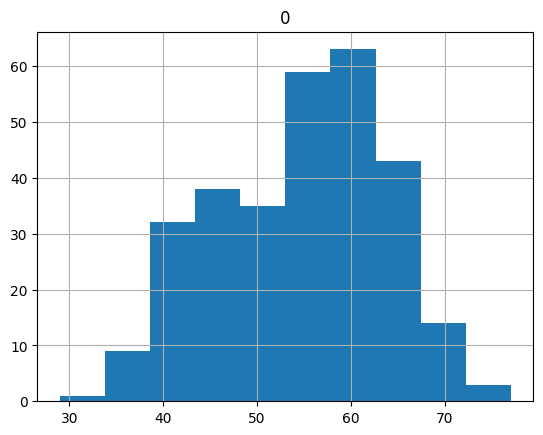

In [ ]:
pd.DataFrame(X[:,0]).hist()

In [ ]:
bins = [0,30,40,50,60,70,np.inf]
labels = [0,1,2,3,4,5]
age_group = pd.cut(X[:,0],bins=bins, labels=labels)
age_group.to_numpy()

array([4, 4, 4, 1, 2, 3, 4, 3, 4, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 4, 3,
       3, 3, 3, 2, 3, 4, 2, 1, 4, 3, 4, 3, 2, 2, 2, 3, 3, 4, 4, 1, 5, 3,
       4, 3, 3, 2, 4, 3, 2, 4, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 2, 4, 4, 4, 4, 2, 4, 3, 3, 2, 3, 2, 3, 1, 4, 3, 2, 2, 3,
       3, 4, 4, 4, 2, 4, 3, 3, 3, 3, 2, 2, 1, 3, 5, 2, 3, 3, 3, 4, 1, 4,
       3, 3, 2, 4, 2, 3, 1, 4, 4, 2, 4, 3, 3, 4, 2, 3, 3, 2, 4, 3, 3, 0,
       3, 2, 3, 4, 4, 1, 3, 3, 3, 3, 4, 3, 2, 3, 2, 2, 3, 3, 2, 4, 3, 4,
       4, 3, 3, 3, 4, 2, 5, 3, 3, 2, 3, 3, 1, 2, 4, 3, 3, 4, 4, 3, 3, 3,
       2, 3, 2, 3, 2, 3, 3, 4, 2, 4, 3, 4, 2, 3, 4, 4, 4, 4, 2, 2, 3, 2,
       4, 3, 4, 2, 2, 3, 2, 3, 4, 1, 1, 2, 4, 3, 3, 2, 2, 4, 3, 2, 3, 1,
       3, 4, 1, 2, 4, 3, 4, 3, 3, 2, 5, 3, 3, 3, 2, 2, 2, 2, 2, 2, 4, 3,
       4, 3, 2, 3, 4, 3, 3, 4, 3, 2, 2, 4, 5, 4, 3, 2, 3, 3, 2, 4, 2, 3,
       1, 2, 4, 4, 2, 5, 3, 4, 4, 1, 3, 3, 3, 2, 3, 1, 4, 3, 3, 3, 3, 4,
       3, 2, 4, 4, 2, 3, 3, 2, 4, 3, 3])

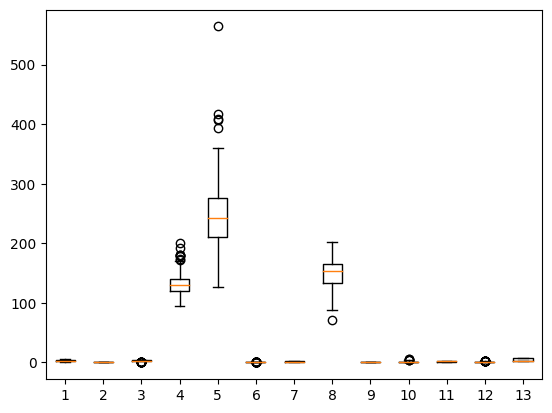

In [ ]:
import matplotlib.pyplot as plt
X[:,1:]
new_X = np.column_stack( (age_group.to_numpy(), X[:,1:]) )
plt.boxplot(new_X)
plt.show()

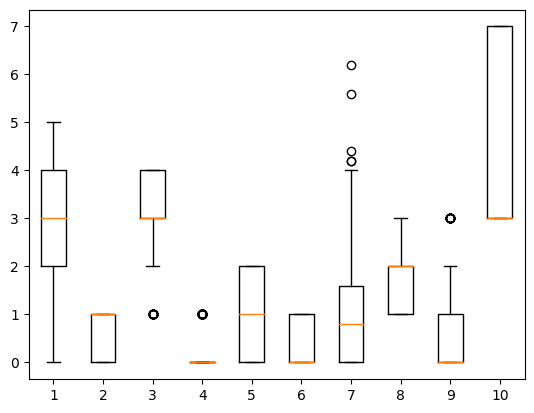

In [ ]:
# 3 4 7 번을 제외하고 boxplot
plt.boxplot(new_X[:,[0,1,2,5,6,8,9,10,11,12]])
plt.show()

In [ ]:
new_X2_scaled.shape, new_y.shape

NameError: name 'new_X2_scaled' is not defined

In [ ]:
new_y[:10]

In [ ]:
# new_X2 = new_X[:,[0,1,2,5,6,8,9,10,11,12]]
new_X2 = new_X

ss=StandardScaler()
new_X2_scaled = ss.fit_transform(new_X2,new_y)
X_train, X_test, y_train, y_test = train_test_split(new_X2_scaled, new_y, stratify=new_y, random_state=0)

n_input = X_train.shape[1]
n_hidden = 15
n_output = 1
selectKBest_model = ANN_Binary(n_input,n_hidden,n_output)
selectKBest_model.fit(X_train,y_train)
selectKBest_model.score(X_test,y_test)